In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt

from cnn_model import create_cnn

train_dir = "data_bare/training"
val_dir = "data_bare/validation"
test_dir = "data_bare/test"

In [3]:
# Load datasets (automatically assigns labels based on folder names)
train_dataset = tf.keras.preprocessing.image_dataset_from_directory(
    train_dir, 
    image_size=(128, 128),  # Resize images to 128x128
    batch_size=32,          # Define batch size
    label_mode='int',        # Labels will be integers (e.g., 0, 1, 2, etc.)
    color_mode="grayscale"  # 👈 Forces images to have 1 channel
)

val_dataset = tf.keras.preprocessing.image_dataset_from_directory(
    val_dir, 
    image_size=(128, 128), 
    batch_size=32, 
    label_mode='int',
    color_mode="grayscale"  # 👈 Forces images to have 1 channel
)

test_dataset = tf.keras.preprocessing.image_dataset_from_directory(
    test_dir, 
    image_size=(128, 128), 
    batch_size=32, 
    label_mode='int',
    color_mode="grayscale"  # 👈 Forces images to have 1 channel
)

Found 15573 files belonging to 8 classes.
Found 4532 files belonging to 8 classes.
Found 2272 files belonging to 8 classes.


In [4]:
# Check class names (labels)
class_names = train_dataset.class_names
print("Class names:", class_names)

Class names: ['APC', 'LBB', 'NOR', 'PAB', 'PVC', 'RBB', 'VEB', 'VFW']


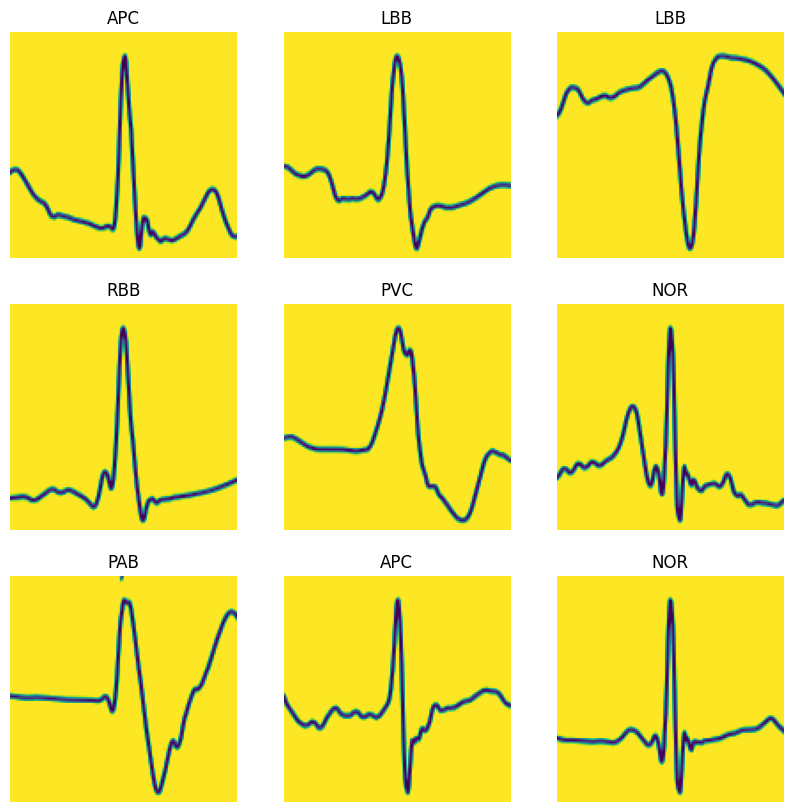

In [ ]:
# Visualize some sample images from the training set
plt.figure(figsize=(10, 10))
for images, labels in train_dataset.take(1):
    for i in range(9):
        plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"), cmap="gray")
        plt.title(class_names[labels[i].numpy()])
        plt.axis("off")
plt.show()

In [6]:

print("Num GPUs Available:", len(tf.config.experimental.list_physical_devices('GPU')))
print("Is GPU being used?", tf.test.is_gpu_available())


Num GPUs Available: 0
Instructions for updating:
Use `tf.config.list_physical_devices('GPU')` instead.
Is GPU being used? False


In [7]:
model = create_cnn()

c:\Users\ethol\College\FinalYearProject\ECG-signal-preprocessing\myenv\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [8]:
# Model summary
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 126, 126, 64)   │           640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 63, 63, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 61, 61, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 28, 28, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     3,211,392 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 8)              │         1,032 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,323,848 (12.68 MB)

 Trainable params: 3,323,848 (12.68 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Train the model
history = model.fit(
    train_dataset,
    validation_data=val_dataset,
    epochs=5  # Adjust the number of epochs as needed
)

Epoch 1/5
487/487 ━━━━━━━━━━━━━━━━━━━━ 69s 140ms/step - accuracy: 0.6103 - loss: 10.4395 - val_accuracy: 0.8866 - val_loss: 0.3519
Epoch 2/5
487/487 ━━━━━━━━━━━━━━━━━━━━ 63s 129ms/step - accuracy: 0.9071 - loss: 0.2890 - val_accuracy: 0.9281 - val_loss: 0.2324
Epoch 3/5
487/487 ━━━━━━━━━━━━━━━━━━━━ 63s 128ms/step - accuracy: 0.9390 - loss: 0.1845 - val_accuracy: 0.9214 - val_loss: 0.2435
Epoch 4/5
487/487 ━━━━━━━━━━━━━━━━━━━━ 62s 127ms/step - accuracy: 0.9577 - loss: 0.1304 - val_accuracy: 0.9259 - val_loss: 0.2741
Epoch 5/5
487/487 ━━━━━━━━━━━━━━━━━━━━ 62s 127ms/step - accuracy: 0.9574 - loss: 0.1346 - val_accuracy: 0.9283 - val_loss: 0.2963


: 

In [15]:
tf.config.list_physical_devices('GPU')

[]

In [ ]:
# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(test_dataset)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

62/62 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - accuracy: 0.4613 - loss: 10.0248
Test Accuracy: 47.16%


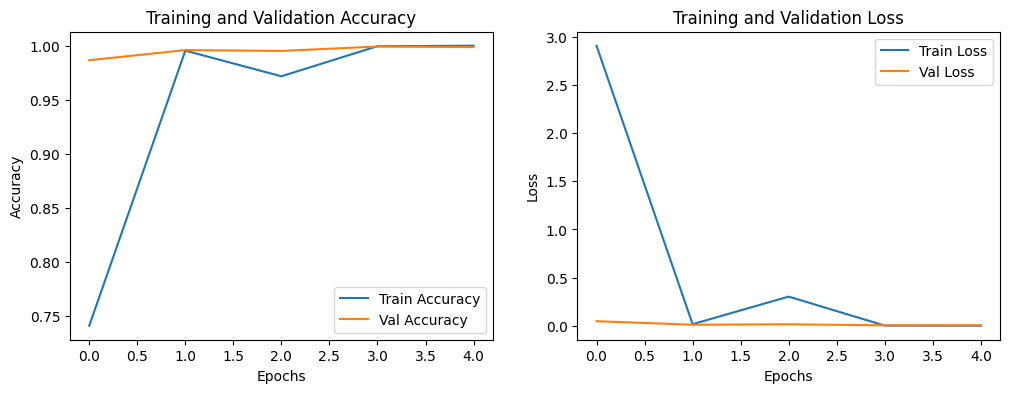

In [ ]:
# Plot training & validation accuracy
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Plot training & validation loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()


In [ ]:
import numpy as np
# Get a batch of test images and labels
test_images, test_labels = next(iter(test_dataset))  # Fetch one batch

# Make predictions
predictions = model.predict(test_images)  # Get probabilities
predicted_labels = np.argmax(predictions, axis=1)  # Convert probabilities to class index

# Print some sample predictions vs. actual labels
print("Predicted labels: ", predicted_labels[:10])
print("Actual labels:    ", test_labels.numpy()[:10])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step
Predicted labels:  [4 1 1 4 4 3 1 1 4 4]
Actual labels:     [0 1 1 6 2 6 5 2 0 7]


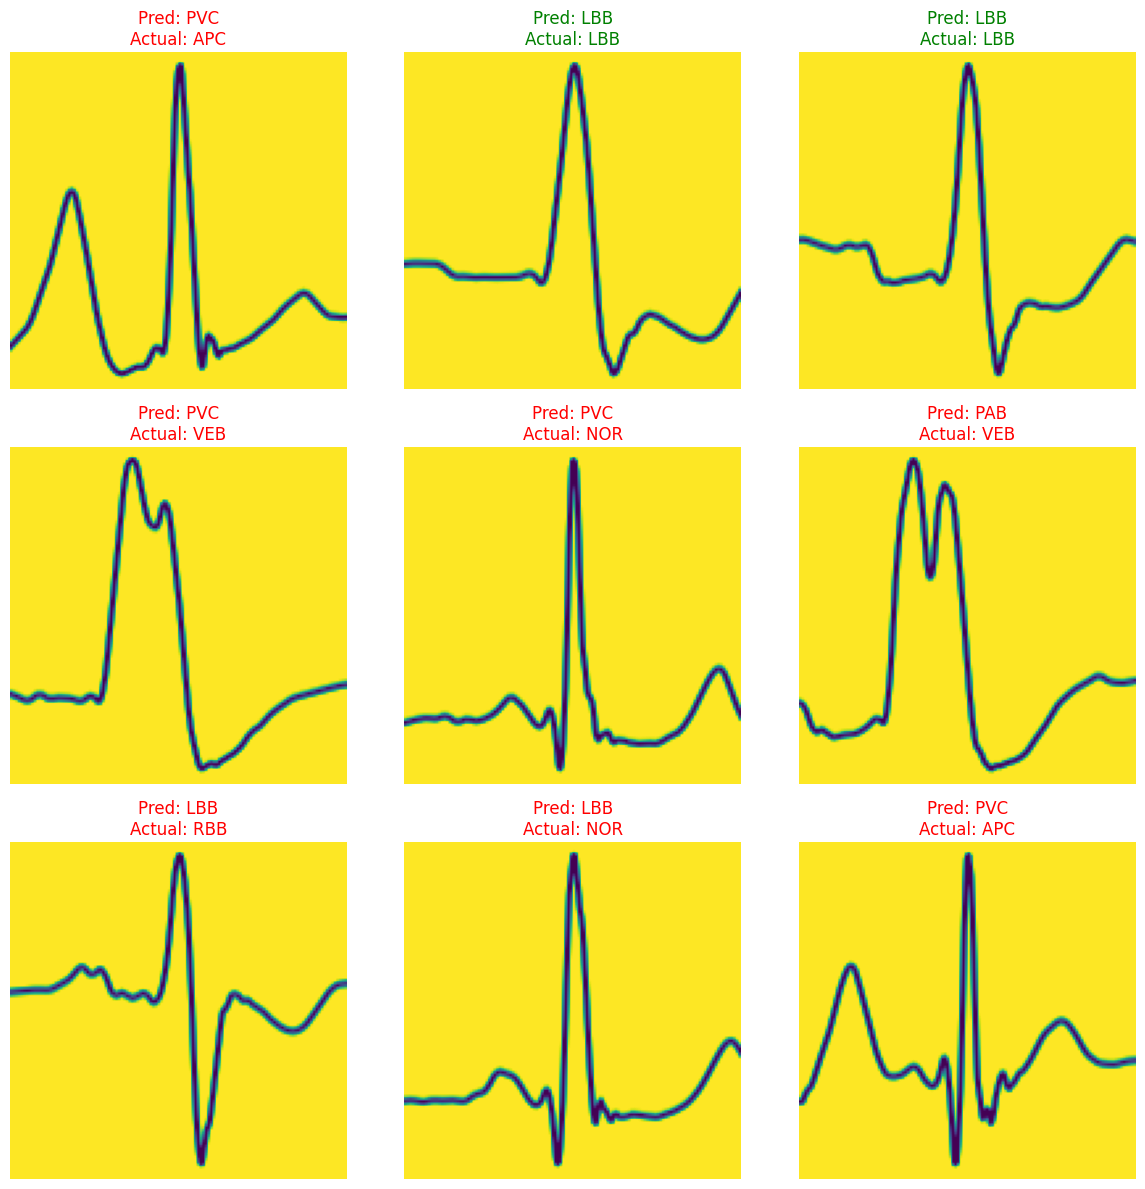

In [ ]:
plt.figure(figsize=(12, 12))

for i in range(9):  # Show 9 sample images
    plt.subplot(3, 3, i + 1)
    plt.imshow(test_images[i].numpy().astype("uint8"))  # Convert tensor to image
    predicted_class = class_names[predicted_labels[i]]
    actual_class = class_names[test_labels[i].numpy()]
    
    color = "green" if predicted_class == actual_class else "red"  # Green if correct, red if wrong
    plt.title(f"Pred: {predicted_class}\nActual: {actual_class}", color=color)
    plt.axis("off")

plt.tight_layout()
plt.show()
